**Proyecto Final, Statistical Learning I**


```
# Fase 1
```


**Luis Adolfo Martinez  - 22000352** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk
import pandas as pd
from sklearn.utils import resample
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
import os
import warnings


In [2]:
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
from joblib import dump
from scipy.special import softmax
from scipy import stats
import random

In [3]:
# Deshabilitar tensorflow versión 2, y dejar activa solo la versión 1
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
direccion = "/content/drive/MyDrive/Dataset/"
os.chdir(direccion)

Carga de datos

In [6]:
titanic_df = pd.read_csv('data_titanic_proyecto.csv')
titanic_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Middle,M,N
887,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Upper,F,Y
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower,F,N
889,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Upper,M,Y


### Feature Engineering

In [7]:
titanic_df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.shape

(891, 12)

**Tratamientos de vacios **

In [9]:
def columnaNaN(df):
  tamaño = len(titanic_df)
  return titanic_df.isna().sum() / tamaño

In [10]:
#porcentajes de nulos en cada columna.
NAN = columnaNaN(titanic_df)
NAN

PassengerId           0.000000
Name                  0.000000
Age                   0.198653
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
passenger_class       0.000000
passenger_sex         0.000000
passenger_survived    0.000000
dtype: float64

1.   Cabin puede ser eliminada ya que tiene un alto porcentaje de NAN
2.   rellenamos Age tiene bajo porcentaje de NAN procemos con la media



In [11]:
#Verificar la mediana de Age
#print(np.nanmedian(titanic_df["Age"]))
titanic_df_2 = titanic_df
edad_media =titanic_df_2.Age.median( skipna = True)
titanic_df_2.Age = titanic_df_2.Age.replace(np.NaN,edad_media)

In [12]:
NAN = columnaNaN(titanic_df_2)
NAN

PassengerId           0.000000
Name                  0.000000
Age                   0.000000
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
passenger_class       0.000000
passenger_sex         0.000000
passenger_survived    0.000000
dtype: float64

In [13]:
# Rellenamos Embarkeg
titanic_df_2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Rellenamos Embarkeg por moda
modaEm =titanic_df_2.Embarked.mode()

titanic_df_2.Embarked = titanic_df_2.Embarked.replace(np.NaN,modaEm[0])
NAN = columnaNaN(titanic_df_2)
NAN

PassengerId           0.000000
Name                  0.000000
Age                   0.000000
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.000000
passenger_class       0.000000
passenger_sex         0.000000
passenger_survived    0.000000
dtype: float64

In [15]:
#Eliminamos Cabin por su alto porcentaje de NAN
del titanic_df_2['Cabin']
NAN = columnaNaN(titanic_df_2)
NAN


PassengerId           0.0
Name                  0.0
Age                   0.0
SibSp                 0.0
Parch                 0.0
Ticket                0.0
Fare                  0.0
Embarked              0.0
passenger_class       0.0
passenger_sex         0.0
passenger_survived    0.0
dtype: float64

**One-Hot Encoding**

In [16]:
#función que comvierte columna categorica a una representación numerica.
def conveNumCate (columna):
  cadena = columna + " = " + "pd.factorize("+columna+")[0]"
  exec(str(cadena))
  

In [17]:
#covnertimos a número las categoricas
conveNumCate("titanic_df_2['Embarked']")
conveNumCate("titanic_df_2['passenger_class']")
conveNumCate("titanic_df_2['passenger_sex']")
conveNumCate("titanic_df_2['passenger_survived']")

In [18]:
#Eliminamos columnas 
del titanic_df_2["PassengerId"]
del titanic_df_2["Name"]
del titanic_df_2["Ticket"]
titanic_df_2.head()


,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,22.0,1,0,7.2500,0,0,0,0
1,38.0,1,0,71.2833,1,1,1,1
2,26.0,0,0,7.9250,0,0,1,1
3,35.0,1,0,53.1000,0,1,1,1
4,35.0,0,0,8.0500,0,0,0,0


In [19]:
def grafica_distplot(filas,columnas,dato):
    fila = 0
    columna = 0
    a, axes = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        sns.distplot(dato[i],ax=axes[fila,columna])
        columna += 1

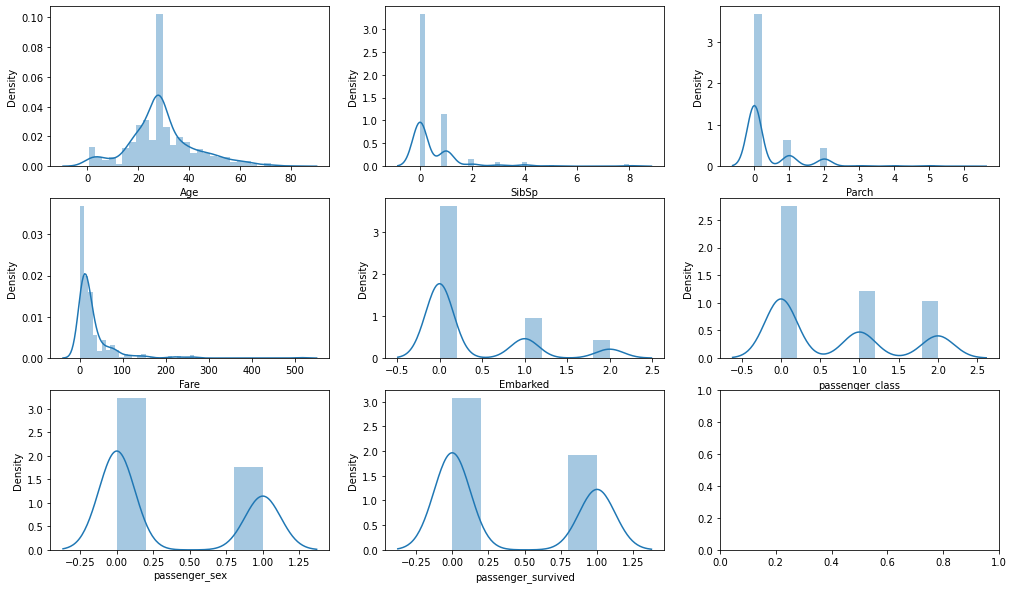

In [20]:
warnings.filterwarnings('ignore')
grafica_distplot(3,3,titanic_df_2)

In [21]:
def grafica_correlacion(filas, columnas,dato,correla):
    fila = 0
    columna = 0
    fig, axs = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        axs[fila,columna].scatter(dato[i],dato['passenger_survived'])
        axs[fila,columna].set_title(i +' coeficiente: '+ str(round(correla[i][0],4)))
        columna += 1

In [22]:
correlacion = titanic_df_2.corr()
correlacion

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
Age,1.000000,-0.233296,-0.172482,0.096688,-0.009165,0.189698,-0.081163,-0.064910
SibSp,-0.233296,1.000000,0.414838,0.159651,-0.059961,-0.085918,0.114631,-0.035322
Parch,-0.172482,0.414838,1.000000,0.216225,-0.078665,-0.010198,0.245489,0.081629
Fare,0.096688,0.159651,0.216225,1.000000,0.062142,0.197168,0.182333,0.257307
Embarked,-0.009165,-0.059961,-0.078665,0.062142,1.000000,-0.168091,0.116569,0.106811
passenger_class,0.189698,-0.085918,-0.010198,0.197168,-0.168091,1.000000,0.118133,0.247845
passenger_sex,-0.081163,0.114631,0.245489,0.182333,0.116569,0.118133,1.000000,0.543351
passenger_survived,-0.064910,-0.035322,0.081629,0.257307,0.106811,0.247845,0.543351,1.000000


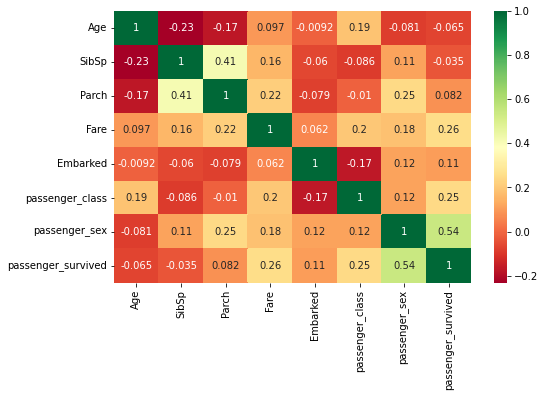

In [23]:
plt.subplots(figsize=(8, 5))
sns.heatmap(titanic_df_2.corr(), annot=True, cmap="RdYlGn")
plt.show()

**Booststrap de los datos**

Dividemos nuestro datos en pruebas , validacion y entrenamiento

In [24]:
titanic_df_2['Age'] = (titanic_df_2['Age'] - min(titanic_df_2['Age']))/ (max(titanic_df_2['Age'])-min(titanic_df_2['Age']))
titanic_df_2['Fare'] = (titanic_df_2['Fare'] - min(titanic_df_2['Fare']))/ (max(titanic_df_2['Fare'])-min(titanic_df_2['Fare']))

In [25]:
titanic_df_2

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,0.271174,1,0,0.014151,0,0,0,0
1,0.472229,1,0,0.139136,1,1,1,1
2,0.321438,0,0,0.015469,0,0,1,1
3,0.434531,1,0,0.103644,0,1,1,1
4,0.434531,0,0,0.015713,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0,2,0,0
887,0.233476,0,0,0.058556,0,1,1,1
888,0.346569,1,2,0.045771,0,0,1,0
889,0.321438,0,0,0.058556,1,1,0,1


In [26]:
df_titanic_val, df_titanic_test = sk.model_selection.train_test_split(titanic_df_2, train_size=0.8, test_size=0.2, shuffle=True)
df_titanic_train,df_titanic_val = sk.model_selection.train_test_split(df_titanic_val, train_size=0.8, test_size=0.2, shuffle=True)

In [27]:
#exportamos dataset de validación para segunda parte
df_titanic_val.to_csv('titanic_validacion.csv')
df_titanic_train
df_titanic_val


,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
734,0.283740,0,0,0.025374,0,2,0,0
469,0.004147,2,1,0.037590,1,0,1,1
847,0.434531,0,0,0.015412,1,0,0,0
363,0.434531,0,0,0.013761,0,0,0,0
406,0.635587,0,0,0.015127,0,0,0,0
...,...,...,...,...,...,...,...,...
627,0.258608,0,0,0.152164,0,1,1,1
181,0.346569,0,0,0.029376,1,2,0,0
528,0.484795,0,0,0.015469,0,0,0,0
513,0.673285,1,0,0.115941,1,1,1,1


In [28]:
#Boostrap 
df_titanic_train_1,df_titanic_train_2,df_titanic_train_s3,df_titanic_train_s4,df_titanic_train_s5 = resample(df_titanic_train,df_titanic_train,df_titanic_train,df_titanic_train,df_titanic_train,n_samples=400)

#**Árbol de decisión con sklearn**

In [29]:
class arbol_predict:
    def __init__(self,feature_names):
        self.modelo = None
        self.feature_names = feature_names
        
    def train(self, data,ylocal, max_depth = 20,splitter = 'best'):    
        tre = tree.DecisionTreeClassifier(max_depth = max_depth,splitter =splitter,criterion='entropy' )
        tre = tre.fit(data[self.feature_names], ylocal)
        self.modelo = tre
        return tre
    
    def predict(self, data):
        return self.modelo.predict(data[self.feature_names])

In [30]:
def creaModelo(x_train,y_train,maxDepth,feature_names):
  splitter = 'best'
  modelo = arbol_predict(feature_names)
  modelo.train(x_train,y_train,maxDepth,splitter)
  return modelo

def ejecutaTest(x_test,y_test,maxDepth,feature_names,modelo):
  fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
  splitter = 'best'
  
  tre = modelo.predict(x_test)
  
  dump(modelo.modelo, 'log_tree/model_tree' + fechaHora + '_maxDepth=' + str(maxDepth) + '_splitter=' + splitter + '.joblib') 
  
  #tn, fp, fn, tp = confusion_matrix(y_test.to_numpy(), tre ).ravel()
  confusion = confusion_matrix(y_test.to_numpy(), tre ).ravel()
  reporte = precision_recall_fscore_support(y_test, tre,average='macro')
  accuracy = sk.metrics.accuracy_score(y_test,tre)
  #f1 = sk.metrics.f1_score(y_test,tre)
  #recal  = sk.metrics.recall_score(y_test,tre)
  #preci = sk.metrics.precision_score(y_test,tre)
  
  print(reporte[0],reporte[1],reporte[2],accuracy)
  columnas = ",".join(feature_names)
  
  resultado = np.array([fechaHora,maxDepth,splitter,
        confusion[0], confusion[1],confusion[2],confusion[3],
        reporte[0],reporte[1],reporte[2],accuracy,columnas
            ])
  resul = pd.DataFrame(resultado).T
  resul.to_csv("log_tree/salida.csv", mode='a', header=False)


In [31]:
feature_names = ['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']
#creaModelo(x_train,y_train,maxDepth,feature_names):
modelo_tree = creaModelo(df_titanic_train_1,pd.DataFrame((df_titanic_train_1['passenger_survived'])),7,feature_names)  



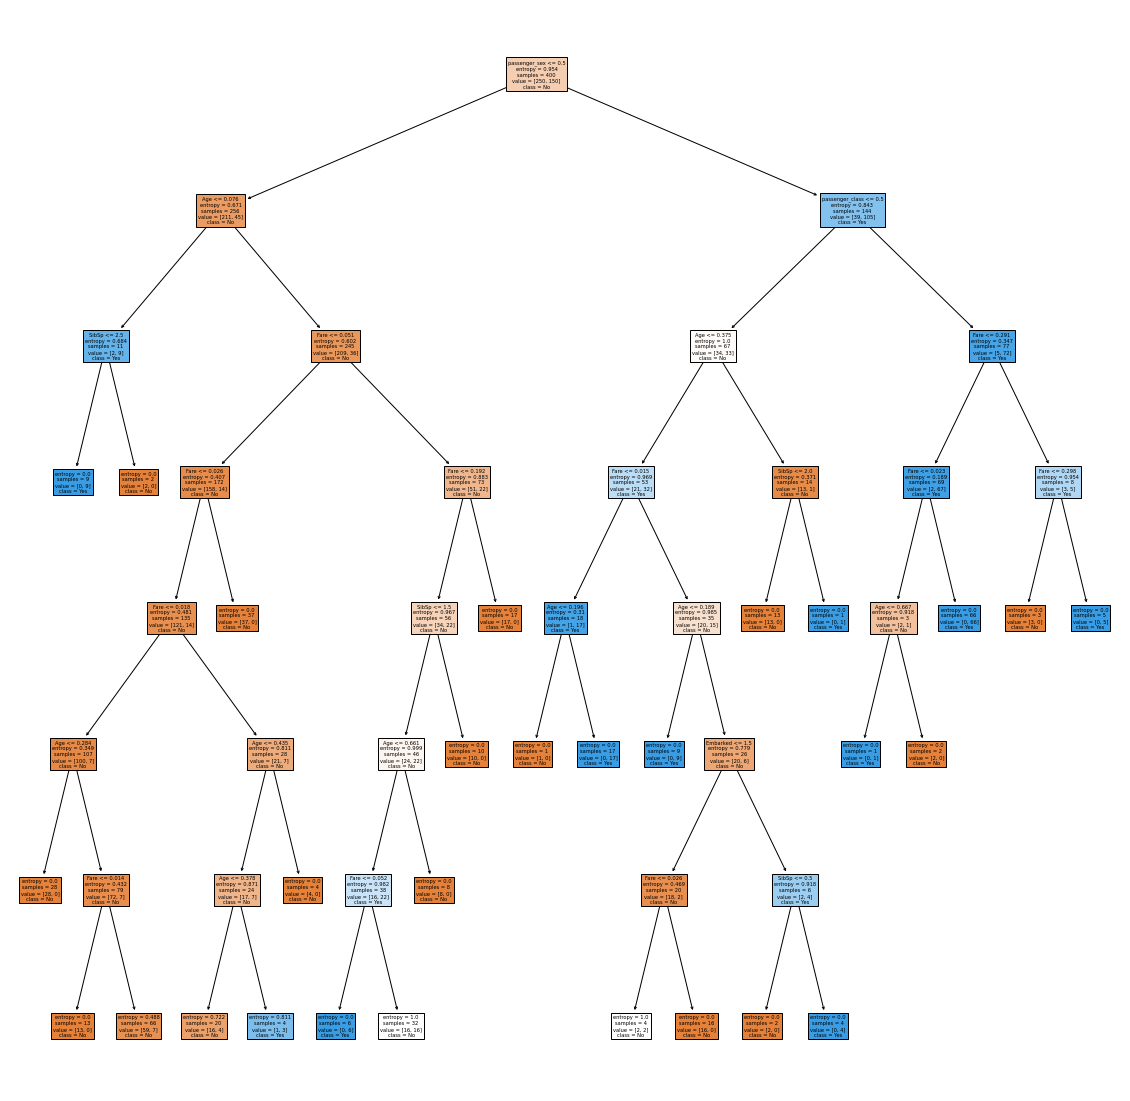

In [32]:
target_names = ['No','Yes']
fig = plt.figure(figsize=(20,20))
c = tree.plot_tree(modelo_tree.modelo, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [33]:
#ejecutaTest(x_test,y_test,maxDepth,feature_names,modelo): y almacenamos registro
ejecutaTest(df_titanic_test,pd.DataFrame((df_titanic_test['passenger_survived'])) ,7,feature_names,modelo_tree)

0.8087627226463104 0.7520119418483904 0.7618347338935574 0.7877094972067039


#**Modelo SVM**

In [34]:
class modelo_SVM:
  def __init__(self,feature_names):
        self.modelo = None
        self.feature_names = feature_names
        
  def train(self, data,ylocal,ker='rbf',gam = 'scale',deg = 3):    
        svm_m = svm.SVC(probability = True,kernel= ker, gamma = gam, degree = deg)
        svm_m = svm_m.fit(data[self.feature_names], ylocal.values.ravel())
        self.modelo = svm_m
        return svm_m
        
    
  def predict(self, data):
       return self.modelo.predict(data[self.feature_names])

In [35]:
def creaModelSVM(x_train,y_train,gamma,degree,feature_names):
  kernel = 'rbf'
  svm = modelo_SVM(feature_names)
  svm.train(x_train,y_train,kernel, gamma, degree)
  return svm

In [36]:
def ejecutaTestSVM(x_test, y_test,gamma,degree,feature_names,modelo):
  fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
  kernel = 'rbf'
  tre = modelo.predict(x_test)
  dump(modelo.modelo, 'log_svm/mod_svm_' + fechaHora + '_kernel=' + kernel + '_gamma=' + gamma + '_degree=' + str(degree) + '.joblib') 
  #tn, fp, fn, tp = confusion_matrix(y_test.to_numpy(), tre ).ravel()
  confusion = confusion_matrix(y_test.to_numpy(), tre ).ravel()

  
  reporte = precision_recall_fscore_support(y_test, tre, average='micro')
  accuracy = sk.metrics.accuracy_score(y_test,tre)
  print(reporte[0],reporte[1],reporte[2],accuracy)
  
  columnas = ",".join(feature_names)

  resultado = np.array([fechaHora,kernel,gamma,
          confusion[0], confusion[1],confusion[2],confusion[3],
          reporte[0],reporte[1],reporte[2],accuracy,columnas
              ])
  salida = pd.DataFrame(resultado).T
  #print(salida.T)
  salida.to_csv("log_svm/mod_svm_salida.csv", mode='a', header=False)


In [37]:
#creamos modelo
#feature_names = ['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']
modelo_svm = creaModelSVM(df_titanic_train_2,pd.DataFrame((df_titanic_train_2['passenger_survived'])),'auto',6,feature_names)

In [38]:
#ejecutaTestSVM(x_test, y_test,gamma,degree,feature_names,modelo):
ejecutaTestSVM(df_titanic_test,pd.DataFrame((df_titanic_test['passenger_survived'])),'auto',6,feature_names,modelo_svm)

0.7821229050279329 0.7821229050279329 0.7821229050279329 0.7821229050279329


#**Modelo Naive Bayes**

# **Regresión Logística**

In [39]:
class RegressionLogistica:
    def __init__(self,clases,tipo):
        self.b = tf.Variable(tf.truncated_normal([clases, tipo]))

        self.biases = tf.Variable(tf.zeros([tipo]))
        self.error = tf.get_variable("error_total",dtype=tf.float32,
                                  shape=[],initializer=tf.zeros_initializer())
        self.prediccion = tf.get_variable("accuracy_total",dtype=tf.float32,
                                  shape=[],initializer=tf.zeros_initializer())

        
    def step(self,x,y,lr,reg):
        print(x,self.b)
        # hipotesis
        yhat = tf.add(tf.matmul(x, self.b, name="matmul"), self.biases,name="hipotesis")
        
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat,labels= y, name="sfmax_entropy")
                               
                               + reg * tf.math.reduce_sum(self.b)
                               ,name="total_entropy")
        
        grad = tf.gradients(error,[self.b,self.biases], name = "gradients")
        
        local_bn = tf.assign(self.b, self.b - tf.multiply(lr,grad[0],name="multi_lr_grad"), name="assign_beta")
        local_bias = tf.assign(self.biases, self.biases - tf.multiply(lr,grad[1],name="multi_lr_grad_bias"), name="assign_beta")
        local_error = tf.assign(self.error, error , name="assign_error")

        with tf.name_scope("accuracy") as scope:
            type_yhat = tf.math.argmax(yhat, 1, name="type_yhat")
            type_y = tf.math.argmax(y, 1, name="type_y")
            cant_ok = tf.reduce_sum(tf.cast(tf.math.equal(type_yhat,type_y), tf.float32), name = "correctos")
            total = tf.cast(tf.shape(y)[0],tf.float32, name = "total")
            local_pred = tf.assign(self.prediccion, (100.0 * cant_ok / total) , name = "asig_accuracy")
        #local_pred = tf.assign(self.prediccion,tf.shape(y))
        salida = tf.group(local_bn,local_bias,local_error, local_pred, name="grupo")

        return salida

In [40]:
#def Modelo_ejecuta(dato_x,dato_y ,lr = 0.002, reg = 0.001,status = 50,batch_size = 32,epochs = 151 ):
def Modelo_ejecuta(dato_x,dato_y ,lr, reg,status,batch_size,epochs):
    tf.reset_default_graph()
    cntClass = 2
    largo = len(dato_x)
    shpData = dato_x.shape
    columnas = shpData[1]
    iteraciones = int(largo/batch_size)
    gd = RegressionLogistica(columnas,cntClass)

    xnpy = dato_x.to_numpy() 
    ynpy = pd.get_dummies(dato_y['passenger_survived'], prefix='passenger_survived').to_numpy()
    dat_x = tf.placeholder(tf.float32,[None,columnas],"Value_x")
    dat_y = tf.placeholder(tf.float32,[None,cntClass],"Value_y")

    step = gd.step(dat_x,dat_y,lr, reg)

    error_summary = tf.summary.scalar('error_sum', gd.error)
    accu_summary = tf.summary.scalar('accuracy_sum', gd.prediccion)

    with tf.train.MonitoredSession() as session:
        localdir = "Log_Reg/model_" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr=" + str(lr) + "_reg=" + str(reg) + "_batch="+ str(batch_size) + "_ephocs=" + str(epochs)
        writer = tf.summary.FileWriter(localdir , session.graph)

        for i in range(epochs):

            for j in range(iteraciones):
                inicio = j * batch_size
                fin = inicio + batch_size
                feed = {dat_x:xnpy[inicio:fin], dat_y:ynpy[inicio:fin]}
                session.run(step,feed_dict=feed)
            esummary ,asummary = session.run([error_summary,accu_summary],feed_dict=feed)
            writer.add_summary(esummary, i)
            writer.add_summary(asummary, i)
                
            feed = {dat_x:xnpy, dat_y:ynpy}
            session.run(step,feed_dict=feed)
            summary = session.run(error_summary,feed_dict=feed)
            if i%status ==0:
                error,pred = session.run([gd.error,gd.prediccion],feed_dict=feed)
                print('epochs',i)
                print("error = {}; accuracy = {}".format(error,pred))


        b,bias,error,pred = session.run([gd.b,gd.biases,gd.error,gd.prediccion],feed_dict=feed)
        #print("y = {} {}".format(b,bias))
        print("error = {}; accuracy = {}".format(error,pred))
    return (b,bias)

In [41]:
class LR_predicion:
    def __init__(self,feature_names,b, bias):
        self.modelo = None
        self.feature_names = feature_names
        self.b = b
        self.bias = bias
        
       
    
    def predict(self, data):
        local = data[self.feature_names].to_numpy()
        y_teorico = np.matmul(local, self.b) + self.bias
        resul = np.argmax(softmax(y_teorico), axis=1)
        return resul

In [42]:
def ejecutaModelR(x_train, y_train,lr,reg,batch_size,epochs,status,feature_names):
  orig_b, original_bias = Modelo_ejecuta(x_train,y_train, lr, reg, status, batch_size, epochs)
  return orig_b, original_bias

In [43]:
def testModelLogi(x_test,y_test,orig_b,original_bias,lr,reg,batch_size,epochs,status,feature_names):
  fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
  columnas = ",".join(feature_names)
  cols = orig_b.shape[0]
  csv_modelo = pd.DataFrame({
      'vars': [columnas],
      'b':[','.join(str(x) for x in orig_b.reshape(14,))],
      'bias': [','.join(str(x) for x in original_bias.reshape(2,))]
  })
  
  csv_modelo.to_csv('Log_Reg/rlg_' + datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr=" + str(lr) + "_reg=" + str(reg) + "_batch="+ str(batch_size) + "_ephocs=" + str(epochs) + '.csv', header=False)
  
  lrlg = LR_predicion(feature_names,orig_b, original_bias)
  tre = lrlg.predict(x_test)
  confu = confusion_matrix(y_test, tre).ravel()
  reporte = precision_recall_fscore_support(y_test, tre, average='micro')
  accuracy = sk.metrics.accuracy_score(y_test,tre)
  #print(confu[0], confu[1], confu[2], confu[3])
  print(reporte[0],reporte[1],reporte[2],accuracy)
  #Resultado
  resu = np.array([fechaHora,lr,batch_size, epochs,
          confu[0], confu[1], confu[2], confu[3],
          reporte[0],reporte[1],reporte[2],accuracy,columnas
              ])
  salida = pd.DataFrame(resu).T

  salida.to_csv("Log_Reg/lg_salida.csv", mode='a', header=False)
  return lrlg


In [44]:
feature_names = ['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']
#ejecutaModelR(x_train, y_train,lr,reg,batch_size,epochs,status,feature_names):
orig_b,original_bias = ejecutaModelR(df_titanic_train_s3[feature_names], pd.DataFrame((df_titanic_train_s3['passenger_survived'])),0.015,0.005,34,2001,500,feature_names)

Tensor("Value_x:0", shape=(?, 7), dtype=float32) <tf.Variable 'Variable:0' shape=(7, 2) dtype=float32_ref>
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
epochs 0
error = 1.450646996498108; accuracy = 37.75
epochs 500
error = 0.41828641295433044; accuracy = 81.0
epochs 1000
error = 0.3835959732532501; accuracy = 81.0
epochs 1500
error = 0.35101836919784546; accuracy = 81.25
epochs 2000
error = 0.3191204071044922; accuracy = 81.25
error = 0.3191204071044922; accuracy = 81.25


In [57]:
%load_ext tensorboard
%tensorboard --logdir Log_Reg/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [45]:
#Prueba modelo con el test
#df_titanic_test
#pd.DataFrame((df_titanic_test['passenger_survived']))
modelo_regre = testModelLogi(df_titanic_test,pd.DataFrame((df_titanic_test['passenger_survived'])),orig_b,original_bias,0.015,0.005,34,2001,500,feature_names)



0.7932960893854749 0.7932960893854749 0.7932960893854749 0.7932960893854749


#**Ensemble learning**

In [46]:
titanic_df

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,0.271174,1,0,0.014151,0,0,0,0
1,0.472229,1,0,0.139136,1,1,1,1
2,0.321438,0,0,0.015469,0,0,1,1
3,0.434531,1,0,0.103644,0,1,1,1
4,0.434531,0,0,0.015713,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0,2,0,0
887,0.233476,0,0,0.058556,0,1,1,1
888,0.346569,1,2,0.045771,0,0,1,0
889,0.321438,0,0,0.058556,1,1,0,1


In [47]:
modelos = [modelo_tree,modelo_svm,modelo_regre]
modelos

In [48]:
def ensable(modelos, data):
    y_pred = []
    for m in modelos:
        y_pred.append(m.predict(data)[0])
    cuenta = stats.mode(y_pred)
    y_pred.append(cuenta[1][0])
    y_pred.append(cuenta[0][0])
    return y_pred

In [49]:
def prediccion_modelos(modelos,data,inicio,fin,tamanio):
  dat = []
  valores = np.random.randint(inicio,fin, size=tamanio)
  for i in valores:
      da = ensable(modelos,data[i:i+1])

      da.append(data[i:i+1]['passenger_survived'].to_numpy()[0])

      dat.append(da)
  dat_resu = pd.DataFrame(dat,columns=['Modelos Tree ','Modelo SVM' ,'Modelo RL','Cantidad','Ensable','Real'])
  return dat_resu


In [50]:
resultado = prediccion_modelos(modelos,titanic_df,1,890,100)
resultado.to_csv('Ensamble.csv')
resultado

,Modelos Tree,Modelo SVM,Modelo RL,Cantidad,Ensable,Real
0,0,0,0,3,0,1
1,1,1,1,3,1,1
2,0,0,0,3,0,0
3,1,1,1,3,1,1
4,0,0,0,3,0,0
...,...,...,...,...,...,...
95,1,1,1,3,1,1
96,0,0,0,3,0,0
97,0,0,0,3,0,0
98,0,0,0,3,0,0


In [51]:
def parametros(resultado):
  confusion = confusion_matrix(resultado['Real'], resultado['Ensable']).ravel()
  precision = confusion[3] / (confusion[3] + confusion[1])
  recall = confusion[3] / (confusion[3] + confusion[2])
  F = (2 * precision * recall) / (precision + recall)

  return precision*100, recall*100, F*100

In [52]:
precision,recall,f = parametros(resultado)

print('Precision: ', precision, '\nRecall: ',recall, '\nF', f)


Precision:  86.11111111111111 
Recall:  60.78431372549019 
F 71.26436781609195


# Conclusiones

Se ejecutaron varias veces los distintos modelos, algunos no tuve el resultado esperado, esto lo logramos observar ya que la selección de muestras fueron independientes separandolas en varias secciones y así cada modelo aprendio de forma diferente, el ejecutar.

Al realizar varias pruebas con distintos modelos podemos decir que la forma de estructurarlos y el uso de la datos afecta los resultados finales.

Este proyecto fue muy interesante realizarlo.


